In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-03T23:02:54.936044+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.47077131271362305}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0039136409759521484}
!!! {"init_...": 0.0005667209625244141}
!!! {"ete3Tree": 0.6409246921539307}
!!! {"GenomeTree_hierarchical": 0.002856731414794922}
!!! {"mutateBranchETEhierarchy": 0.09227919578552246}
!!! {"write_genome_short": 0.04830622673034668}


  4%|▎         | 7/193 [00:03<01:00,  3.06it/s]

!!! {"writeGenomeNoIndels": 0.17102479934692383}
!!! {"pl.DataFrame": 0.045815467834472656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0114946365356445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017204999923706055}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033254623413085938}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001316070556640625}
!!! {"init_...": 0.0004906654357910156}
!!! {"ete3Tree": 7.510185241699219e-05}
!!! {"GenomeTree_hierarchical": 0.002144336700439453}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 6.961822509765

  7%|▋         | 14/193 [00:03<00:25,  7.10it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004824638366699219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00027179718017578125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032782554626464844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010371208190917969}
!!! {"init_...": 0.00043010711669921875}
!!! {"ete3Tree": 0.000820159912109375}
!!! {"GenomeTree_hierarchical": 0.0026977062225341797}
!!! {"mutateBranchETEhierarchy": 0.0001373291015625}
!!! {"write_genome_short": 0.00013494491577148438}
!!! {"writeGenomeNoIndels": 0.0002391338348388672}
!!! {"pl.DataFrame": 0.0001

 13%|█▎        | 26/193 [00:03<00:11, 15.15it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009121417999267578}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011563301086425781}
!!! {"init_...": 0.0004363059997558594}
!!! {"ete3Tree": 0.019670963287353516}
!!! {"GenomeTree_hierarchical": 0.001953601837158203}
!!! {"mutateBranchETEhierarchy": 0.0049152374267578125}
!!! {"write_genome_short": 0.0023407936096191406}
!!! {"writeGenomeNoIndels": 0.00800180435180664}
!!! {"pl.DataFrame": 0.0016429424285888672}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04093050956726074}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009338855743408203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newic

 21%|██        | 40/193 [00:03<00:05, 27.50it/s]

!!! {"phastSimRun": 0.0001125335693359375}
!!! {"init_...": 0.0005209445953369141}
!!! {"ete3Tree": 0.00043320655822753906}
!!! {"GenomeTree_hierarchical": 0.002050161361694336}
!!! {"mutateBranchETEhierarchy": 8.130073547363281e-05}
!!! {"write_genome_short": 0.0002598762512207031}
!!! {"writeGenomeNoIndels": 0.00014519691467285156}
!!! {"pl.DataFrame": 0.00010132789611816406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006266117095947266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019478797912597656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030701160430908203}
enter log_context_duration for

 24%|██▍       | 46/193 [00:03<00:04, 30.57it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00862884521484375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011563301086425781}
!!! {"init_...": 0.00043702125549316406}
!!! {"ete3Tree": 0.020629167556762695}
!!! {"GenomeTree_hierarchical": 0.0025501251220703125}
!!! {"mutateBranchETEhierarchy": 0.004513263702392578}
!!! {"write_genome_short": 0.0023810863494873047}
!!! {"writeGenomeNoIndels": 0.008538961410522461}
!!! {"pl.DataFrame": 0.0016524791717529297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042465925216674805}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00099062

 31%|███       | 60/193 [00:04<00:03, 42.62it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034189224243164062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.775161743164062e-05}
!!! {"init_...": 0.00041604042053222656}
!!! {"ete3Tree": 5.745887756347656e-05}
!!! {"GenomeTree_hierarchical": 0.0026710033416748047}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 6.4849853515625e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.843971252441406e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005073070526123047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000199

 38%|███▊      | 74/193 [00:04<00:02, 51.27it/s]

!!! {"phastSimRun": 9.965896606445312e-05}
!!! {"init_...": 0.0005209445953369141}
!!! {"ete3Tree": 7.295608520507812e-05}
!!! {"GenomeTree_hierarchical": 0.0020618438720703125}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.556510925292969e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.651878356933594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0048542022705078125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018024444580078125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=16, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031061172485351562}
enter log_context_duration for

 41%|████▏     | 80/193 [00:04<00:02, 50.12it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7179718017578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003381967544555664}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011801719665527344}
!!! {"init_...": 0.00041365623474121094}
!!! {"ete3Tree": 5.817413330078125e-05}
!!! {"GenomeTree_hierarchical": 0.0021119117736816406}
!!! {"mutateBranchETEhierarchy": 9.298324584960938e-06}
!!! {"write_genome_short": 6.771087646484375e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 8.535385131835938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004519462585449219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001

 45%|████▍     | 86/193 [00:04<00:02, 42.84it/s]

!!! {"pl.DataFrame": 0.001813650131225586}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04140019416809082}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009407997131347656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003175020217895508}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012040138244628906}
!!! {"init_...": 0.00045609474182128906}
!!! {"ete3Tree": 0.00019550323486328125}
!!! {"GenomeTree_hierarchical": 0.0020809173583984375}
!!! {"mutateBranchETEhierarchy": 3.647804260253906e-05}
!!! {"write_genome_short": 8.368492126464844e-05}
!!! {"writeGenomeNoIndels": 5.22136

 51%|█████     | 98/193 [00:04<00:02, 46.62it/s]

!!! {"write_genome_short": 0.000469207763671875}
!!! {"writeGenomeNoIndels": 2.1457672119140625e-05}
!!! {"pl.DataFrame": 9.608268737792969e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0052127838134765625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002155303955078125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031104087829589844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010585784912109375}
!!! {"init_...": 0.0004303455352783203}
!!! {"ete3Tree": 6.0558319091796875e-05}
!!! {"GenomeTree_hierarchical": 0.0024204254150390625}
!!! {"mutateBranchETEhierarchy": 1.025

 57%|█████▋    | 110/193 [00:05<00:01, 47.83it/s]

!!! {"write_genome_short": 0.0006234645843505859}
!!! {"writeGenomeNoIndels": 6.008148193359375e-05}
!!! {"pl.DataFrame": 0.00010728836059570312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005740165710449219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002148151397705078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=8, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003542184829711914}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010228157043457031}
!!! {"init_...": 0.0004382133483886719}
!!! {"ete3Tree": 0.000102996826171875}
!!! {"GenomeTree_hierarchical": 0.0020487308502197266}
!!! {"mutateBranchETEhierarchy": 1.811981

 63%|██████▎   | 122/193 [00:05<00:01, 51.95it/s]

!!! {"init_...": 0.0009212493896484375}
!!! {"ete3Tree": 9.608268737792969e-05}
!!! {"GenomeTree_hierarchical": 0.002093076705932617}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 0.0003113746643066406}
!!! {"writeGenomeNoIndels": 2.8371810913085938e-05}
!!! {"pl.DataFrame": 0.00011682510375976562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005395650863647461}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002033710479736328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030374526977539062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000119

 70%|██████▉   | 135/193 [00:05<00:01, 55.79it/s]

!!! {"write_genome_short": 0.0015408992767333984}
!!! {"writeGenomeNoIndels": 0.0020246505737304688}
!!! {"pl.DataFrame": 0.00043702125549316406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.015011787414550781}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037384033203125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=21, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003096342086791992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.00041031837463378906}
!!! {"ete3Tree": 0.00018262863159179688}
!!! {"GenomeTree_hierarchical": 0.0020656585693359375}
!!! {"mutateBranchETEhierarchy": 3.29017

 74%|███████▎  | 142/193 [00:05<00:00, 58.22it/s]

!!! {"phastSimRun": 0.00010275840759277344}
!!! {"init_...": 0.0005104541778564453}
!!! {"ete3Tree": 6.818771362304688e-05}
!!! {"GenomeTree_hierarchical": 0.002110719680786133}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 6.866455078125e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 8.368492126464844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005346775054931641}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001819133758544922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003089427947998047}
enter log_context_duration for _do_run_p

 77%|███████▋  | 148/193 [00:05<00:01, 44.22it/s]

!!! {"write_genome_short": 0.0034821033477783203}
!!! {"writeGenomeNoIndels": 0.011724710464477539}
!!! {"pl.DataFrame": 0.002202749252319336}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05545353889465332}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011768341064453125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009115457534790039}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013136863708496094}
!!! {"init_...": 0.00047588348388671875}
!!! {"ete3Tree": 0.02339649200439453}
!!! {"GenomeTree_hierarchical": 0.0020432472229003906}
!!! {"mutateBranchETEhierarchy": 0.0059790

 80%|████████  | 155/193 [00:06<00:00, 45.42it/s]

!!! {"phastSimRun": 0.0001614093780517578}
!!! {"init_...": 0.0005817413330078125}
!!! {"ete3Tree": 0.014193058013916016}
!!! {"GenomeTree_hierarchical": 0.0026285648345947266}
!!! {"mutateBranchETEhierarchy": 0.003198385238647461}
!!! {"write_genome_short": 0.0017006397247314453}
!!! {"writeGenomeNoIndels": 0.005743980407714844}
!!! {"pl.DataFrame": 0.0011250972747802734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03198504447937012}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007481575012207031}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031890869140625}
enter log_context_duration for _do_run_p

 83%|████████▎ | 160/193 [00:07<00:02, 12.13it/s]

!!! {"mutateBranchETEhierarchy": 0.04439663887023926}
!!! {"write_genome_short": 0.021820545196533203}
!!! {"writeGenomeNoIndels": 0.07147645950317383}
!!! {"pl.DataFrame": 0.012871503829956055}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3266453742980957}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00601649284362793}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031807422637939453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015783309936523438}
!!! {"init_...": 0.00047135353088378906}
!!! {"ete3Tree": 8.368492126464844e-05}
!!! {"GenomeTree_hierarchical": 0.00221753120422

 85%|████████▌ | 165/193 [00:07<00:01, 14.97it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0064008235931396484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000102996826171875}
!!! {"init_...": 0.0004374980926513672}
!!! {"ete3Tree": 0.009041309356689453}
!!! {"GenomeTree_hierarchical": 0.0020020008087158203}
!!! {"mutateBranchETEhierarchy": 0.0020041465759277344}
!!! {"write_genome_short": 0.001169443130493164}
!!! {"writeGenomeNoIndels": 0.003483295440673828}
!!! {"pl.DataFrame": 0.0006871223449707031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020589590072631836}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005085468292236328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=740, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_ne

 92%|█████████▏| 178/193 [00:07<00:00, 22.24it/s]

!!! {"ete3Tree": 0.06373119354248047}
!!! {"GenomeTree_hierarchical": 0.0020651817321777344}
!!! {"mutateBranchETEhierarchy": 0.015462160110473633}
!!! {"write_genome_short": 0.007606029510498047}
!!! {"writeGenomeNoIndels": 0.025371789932250977}
!!! {"pl.DataFrame": 0.004735469818115234}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12158513069152832}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002405881881713867}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003187417984008789}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013256072998046875}
!!! {"init_...": 0.00046038627624

 95%|█████████▍| 183/193 [00:07<00:00, 25.72it/s]

!!! {"ete3Tree": 0.008990287780761719}
!!! {"GenomeTree_hierarchical": 0.002588033676147461}
!!! {"mutateBranchETEhierarchy": 0.0021581649780273438}
!!! {"write_genome_short": 0.0019423961639404297}
!!! {"writeGenomeNoIndels": 0.0037126541137695312}
!!! {"pl.DataFrame": 0.0007729530334472656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02228403091430664}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005233287811279297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9788742065429688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030527114868164062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011682510375976562}
!!! {"init_...": 0.00041007

100%|██████████| 193/193 [00:08<00:00, 23.56it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003845691680908203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015091896057128906}
!!! {"init_...": 0.0004773139953613281}
!!! {"ete3Tree": 7.104873657226562e-05}
!!! {"GenomeTree_hierarchical": 0.002095460891723633}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 6.890296936035156e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0046083927154541016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002086162567138672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2632908821105957}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.031113862991333008}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003056049346923828}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033304452896118164}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0019273757934570312}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003221750259399414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.032915353775024414}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0025942325592041016}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 22.98it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033505916595458984}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003401517868041992}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0031697750091552734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03313088417053223}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0032699108123779297}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0032167434692382812}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismat

100%|██████████| 7/7 [00:00<00:00, 23.88it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03360557556152344}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003694295883178711}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.001947164535522461}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020773649215698242}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0028696060180664062}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.374819278717041}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2520105838775635}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 3751/3751 [00:25<00:00, 149.65it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.56740093231201}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:03<00:00, 942.86it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 113.68876361846924}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.053395748138427734}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 175.6418514251709}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.00897359848022461}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003402233123779297}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003867149353027344}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.000385284423828125}
ancestral_se


100%|██████████| 368/368 [00:00<00:00, 178522.31it/s]

process mutations:   0%|          | 1/368 [00:00<01:12,  5.08it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:14<11:24,  1.90s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.4s



process mutations:  13%|█▎        | 48/368 [00:51<05:34,  1.04s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.6s



process mutations:  24%|██▍       | 88/368 [01:30<04:39,  1.00it/s]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:09<03:58,  1.01it/s]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:47<03:14,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min



process mutations:  57%|█████▋    | 208/368 [03:25<02:34,  1.04it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.6min



process mutations:  67%|██████▋   | 248/368 [04:04<01:56,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.3min



process mutations:  78%|███████▊  | 288/368 [04:45<01:18,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.0min



process mutations:  89%|████████▉ | 328/368 [05:23<00:39,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.6min



process mutations: 100%|██████████| 368/368 [06:06<00:00,  1.00it/s]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.2min finished


process replicate: 100%|██████████| 1/1 [09:15<00:00, 555.38s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.07992005348205566}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'd0b4dc26-6e2b-8892-be45-9e26ffe4296a', 'd0b4dc26-6e2b-8892-be45-9e26ffe4296a', 'd0b4dc26-6e2b-8892-be45-9e26ff
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


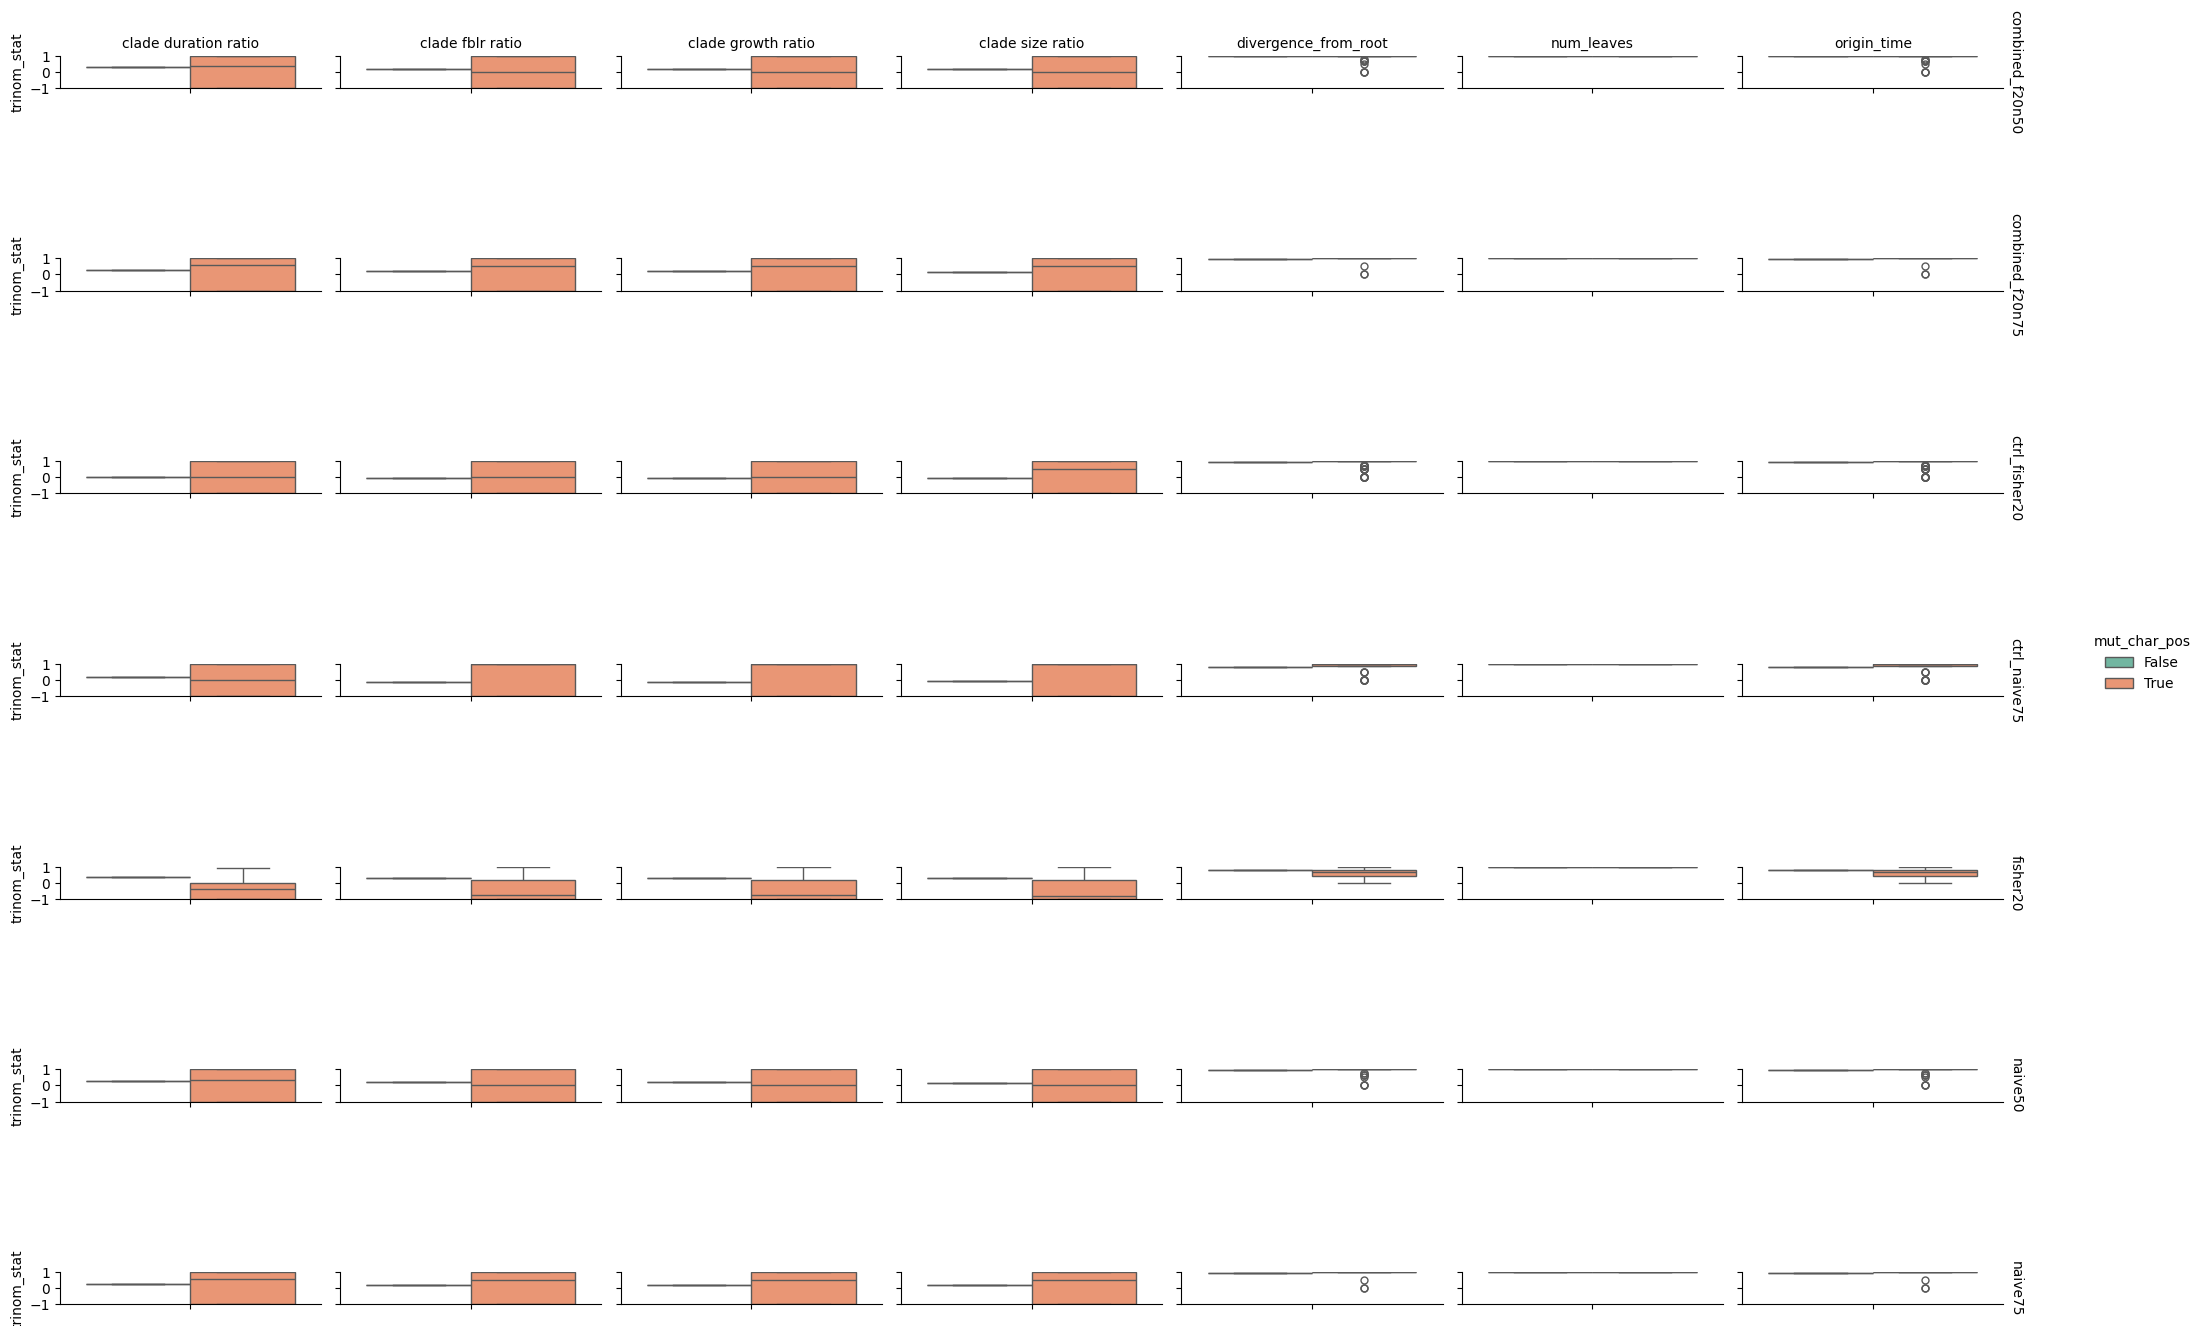

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


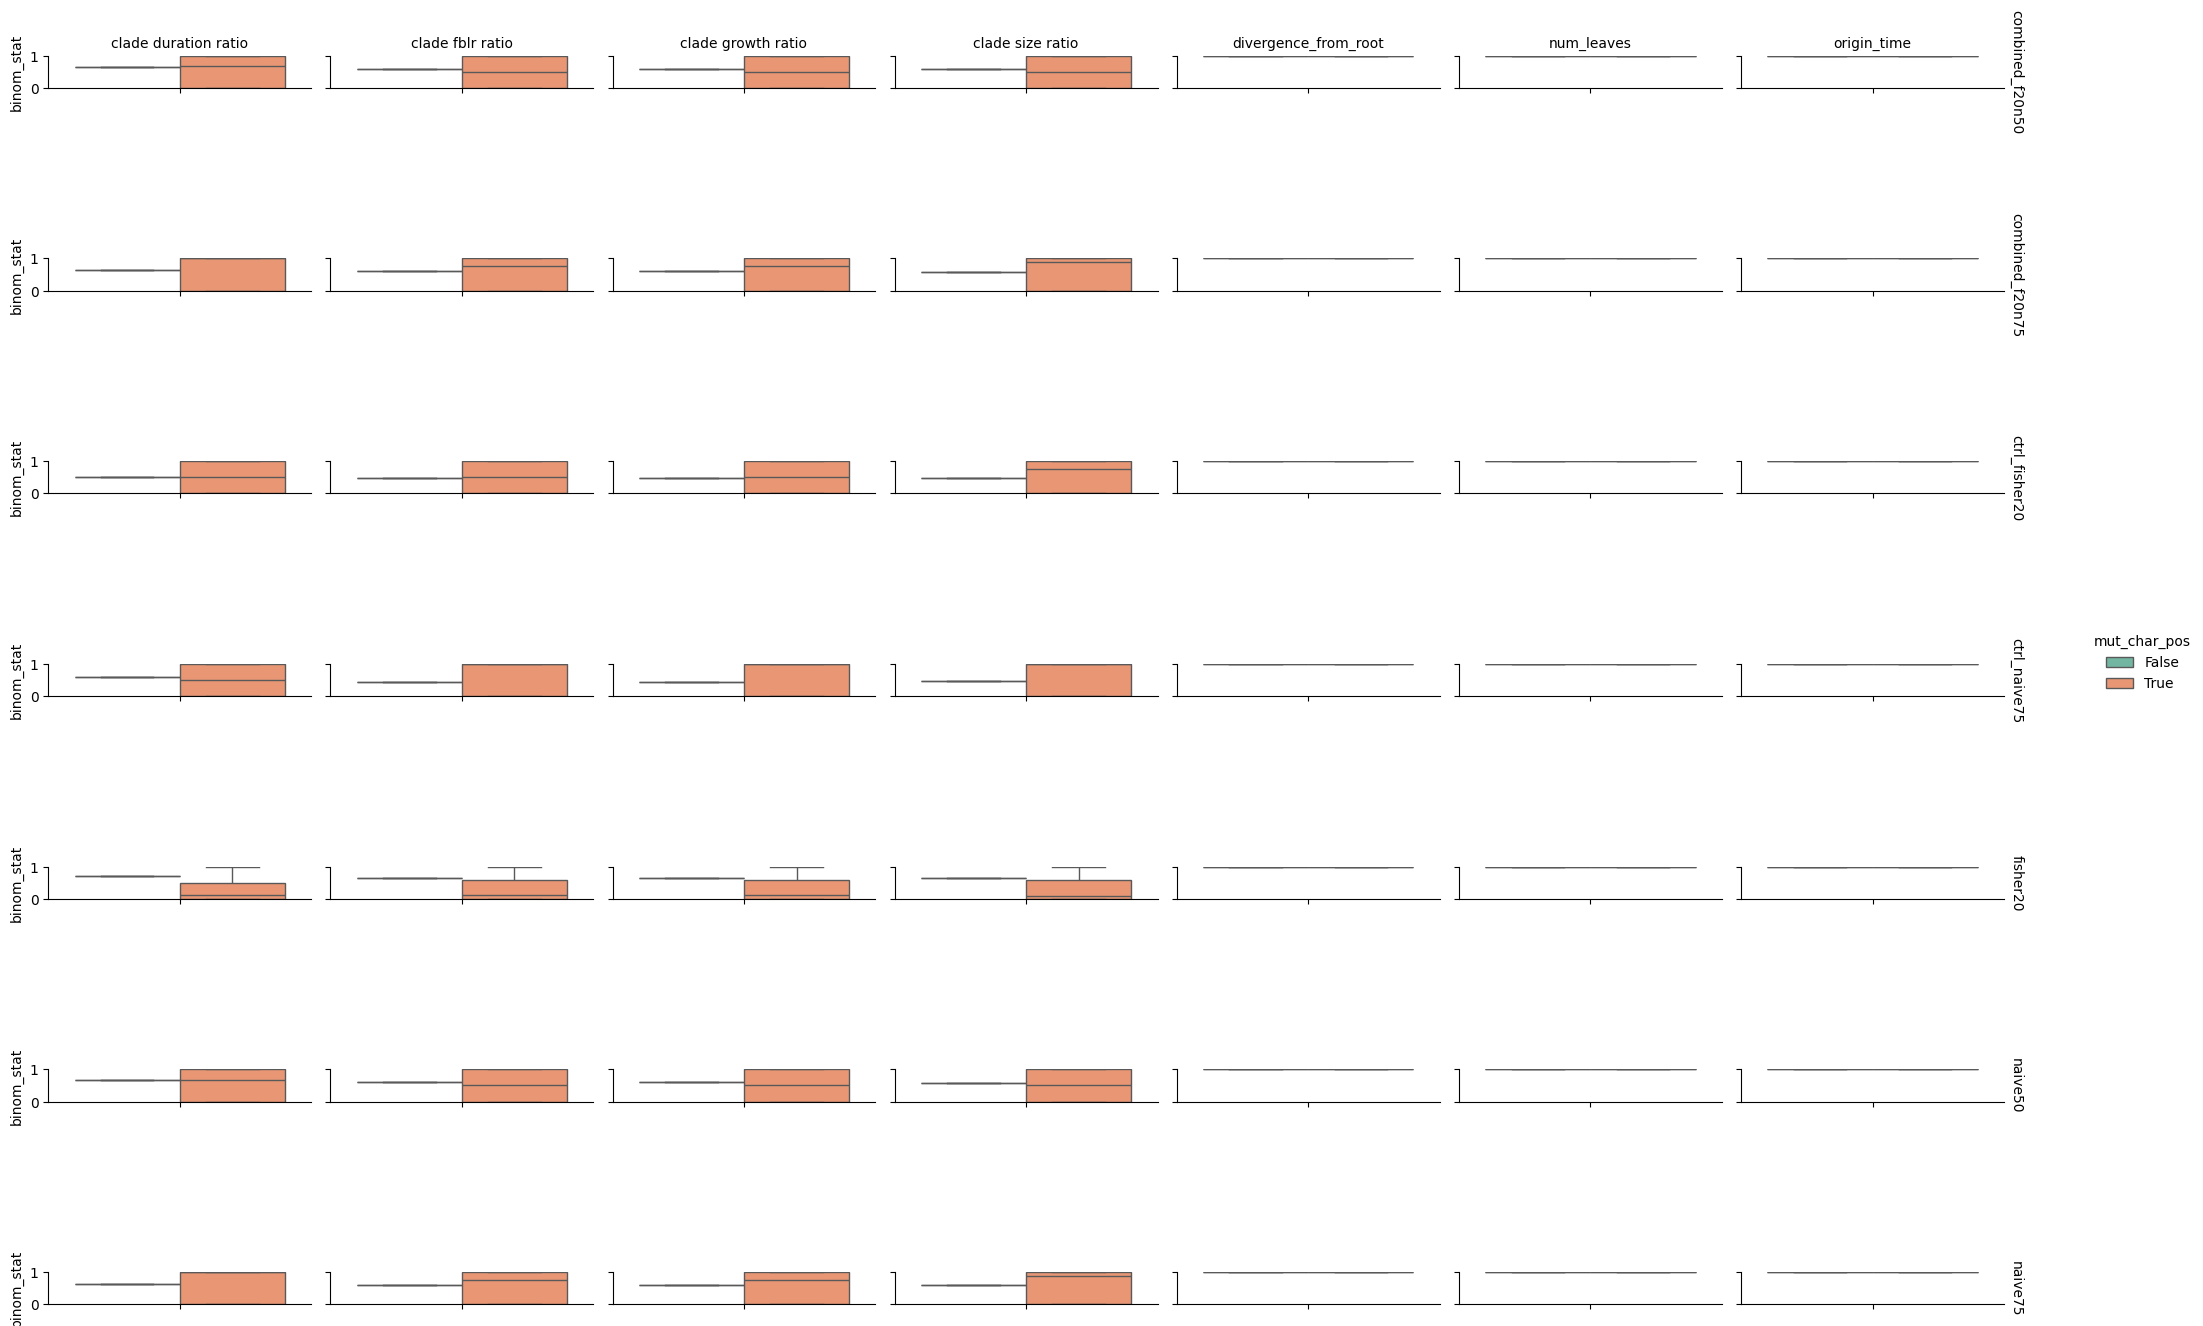

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


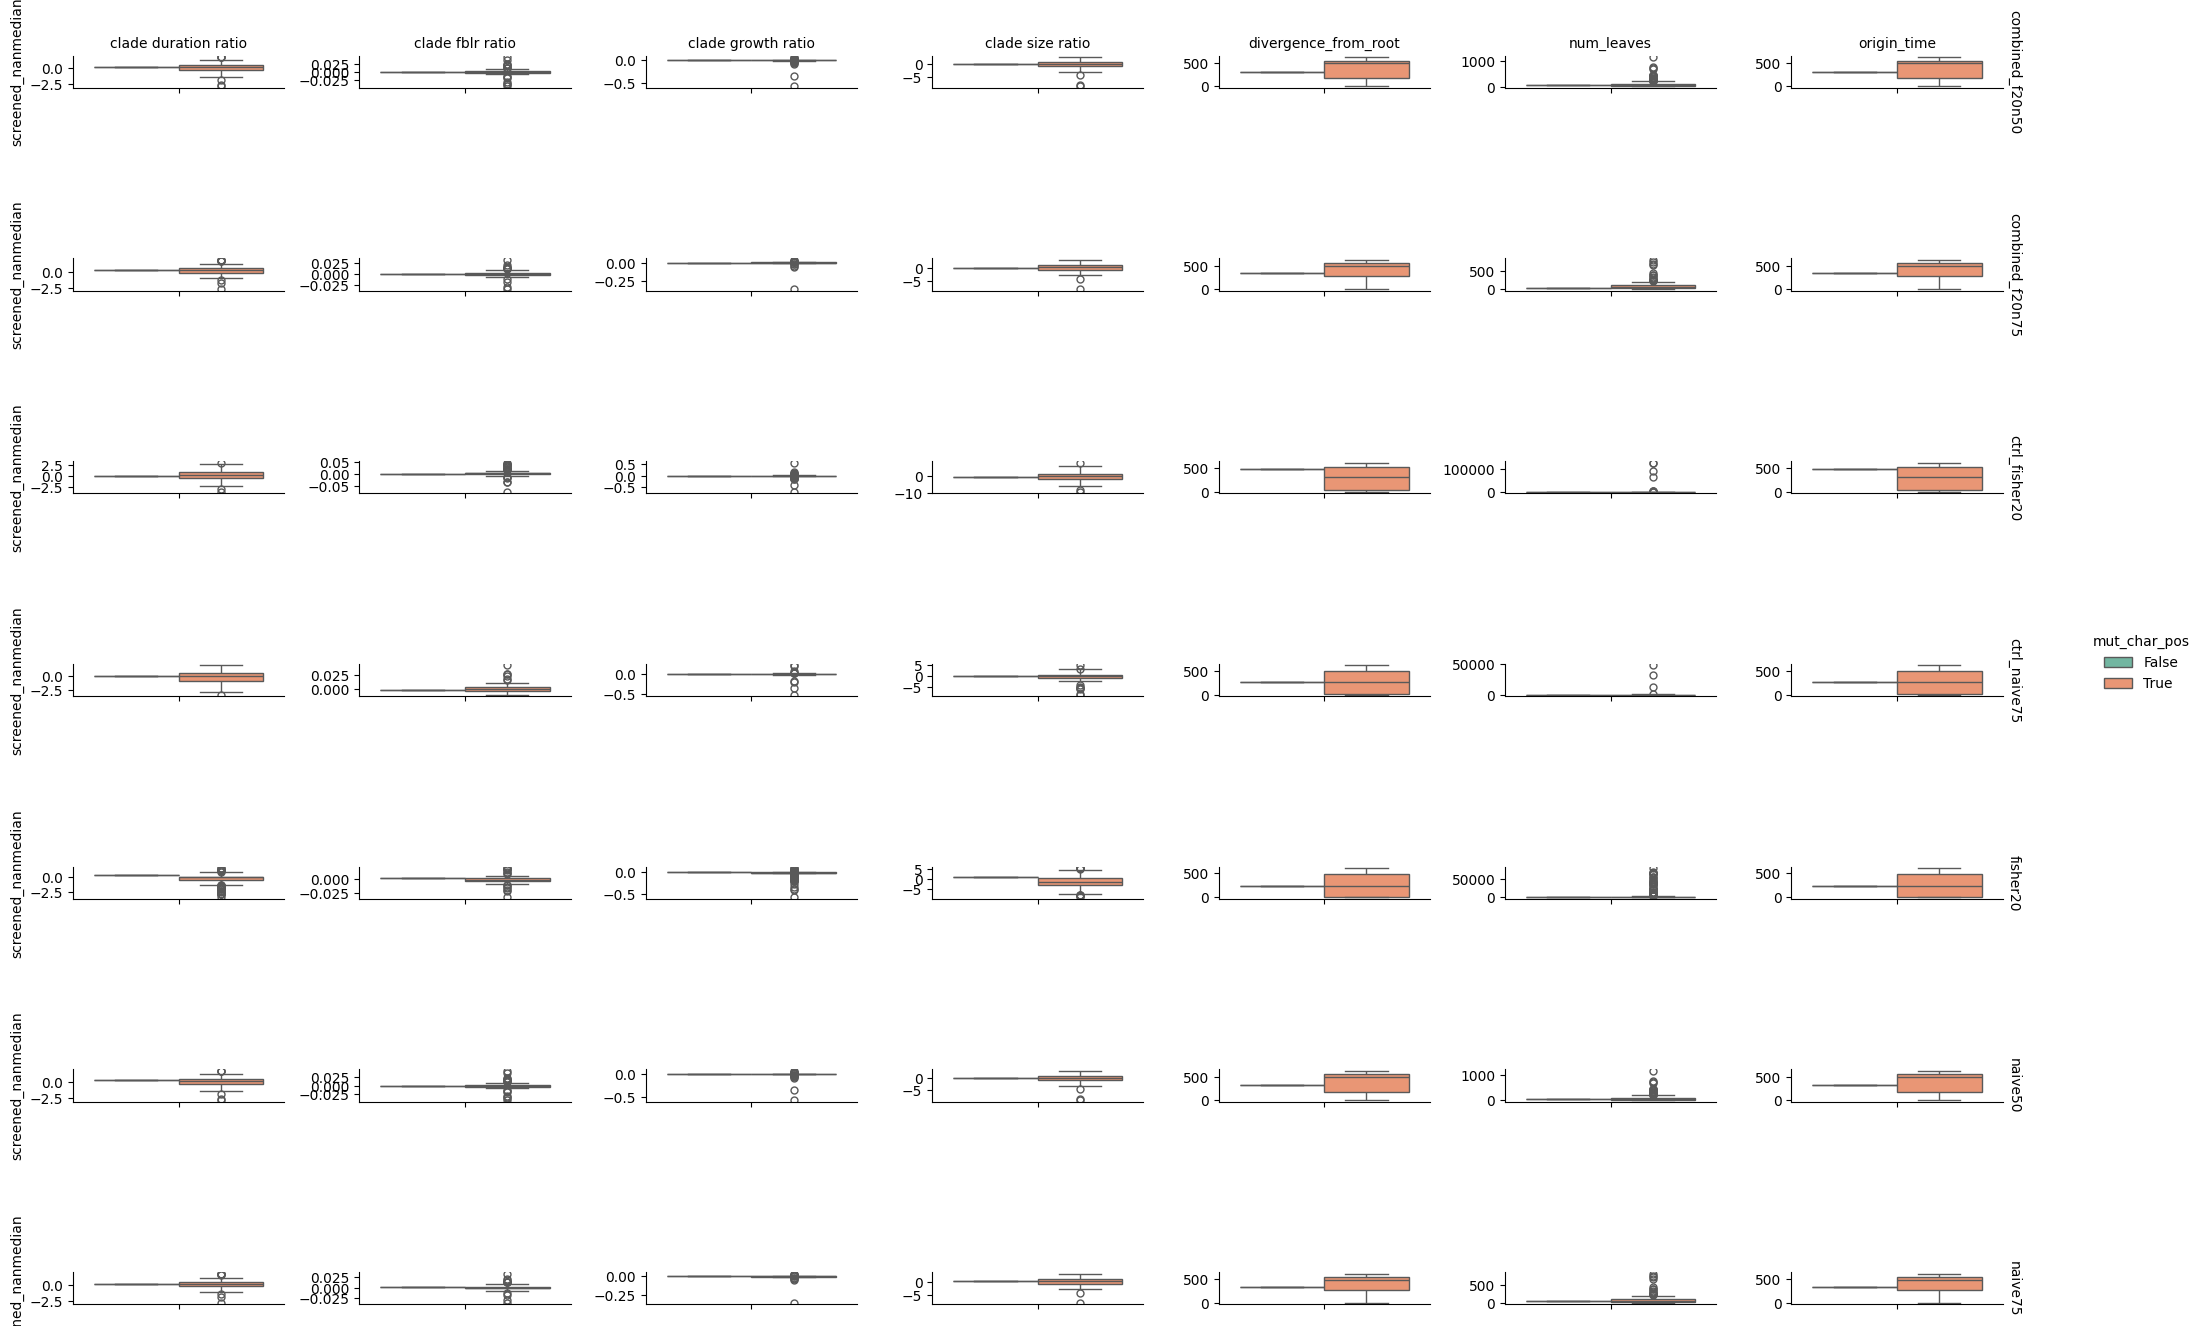

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


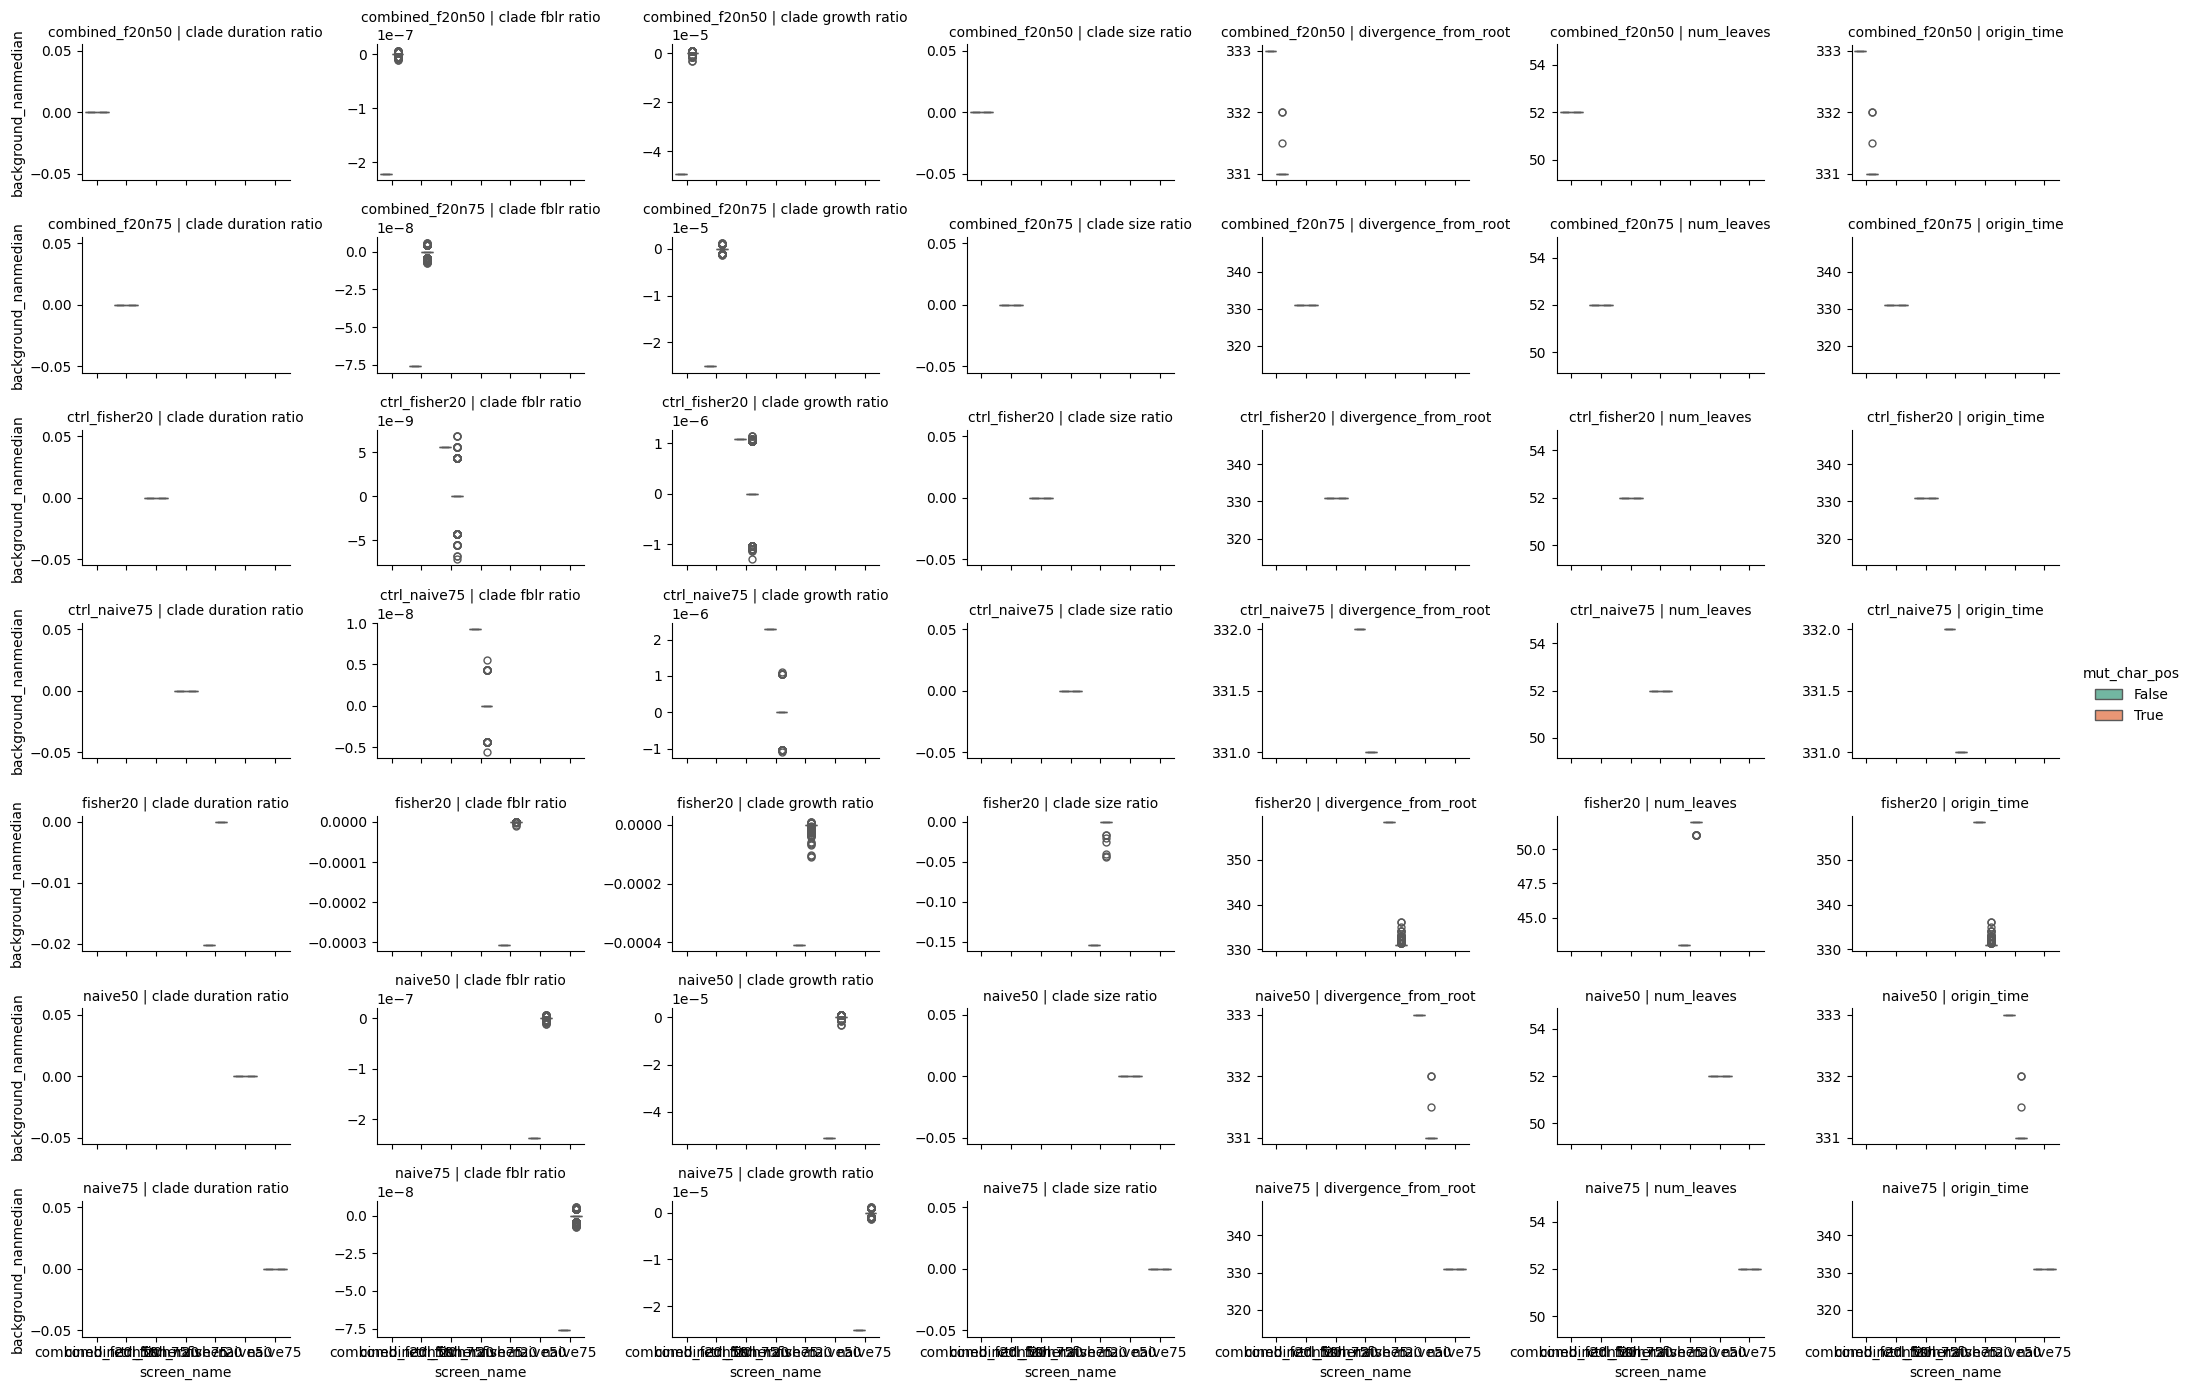

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
